## Sentiment Analysis

##### What is Sentiment Analysis?
    Sentiment Analysis, as the name suggests, it means to identify the view or emotion behind a situation. It basically means to analyze and find the emotion or intent behind a piece of text or speech or any mode of communication. 
    In this project, we will focus on sentiment analysis of text data.

##### Import Libraries

In [53]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

##### Load Dataset

In [2]:
train = pd.read_csv('train.csv', encoding = 'latin1')
test = pd.read_csv('test.csv', encoding = 'latin1')

In [3]:
df = pd.concat([train, test])

In [4]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [5]:
df.shape

(32296, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB


In [7]:
# Check missing values
df.isnull().sum()

textID              1281
text                1282
selected_text       4816
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

All missing values are removed from dataset.

##### Drop unuseful data from dataset:
    textID, Time of Tweet, Age of User, Country, Population -2020, Land Area (Km²), Density (P/Km²) are non-useful column, so we can drop it.

In [10]:
df.drop(['textID','Time of Tweet','Age of User','Country','Population -2020','Land Area (Km²)', 'Density (P/Km²)'], axis = 1, inplace = True)

In [11]:
df.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


Now my dataset contains 3 columns text, selected text, and sentiment which holds the polarity information of text.
Let's see the frequency count of the text w.r.t. polarity

In [12]:
df['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

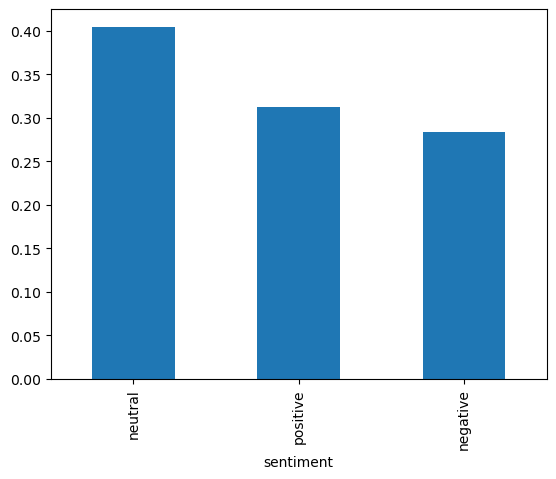

In [13]:
# draw plot for sentiments
df['sentiment'].value_counts(normalize = True).plot(kind = 'bar')

Sentiments are categorical varaible convert it into numerical variable.

In [14]:
df['sentiment'] = df['sentiment'].astype('category').cat.codes

<Axes: xlabel='sentiment'>

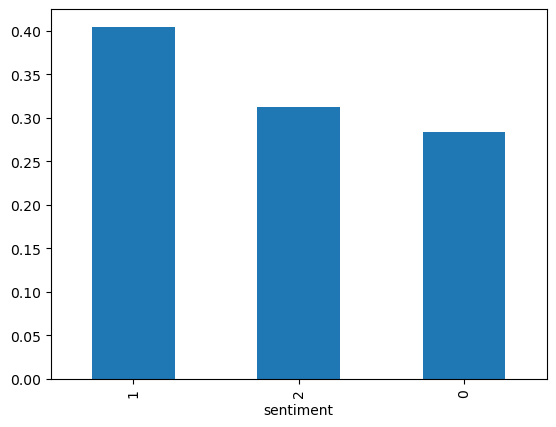

In [15]:
df['sentiment'].value_counts(normalize = True).plot(kind = 'bar')

Now for neutral - 1, positive - 2, negative - 0

In [16]:
df.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,my boss is bullying me...,bullying me,0
3,what interview! leave me alone,leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0


##### Processing texts steps:

##### Step-1. Remove punctuation:

    It is important to remove punctuation from text as they do not play any significant role in the text during modelling.
    So it is important to remove them.

In [17]:
import re
import string

In [18]:
def processed_text(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [19]:
df['selected_text'] = df['selected_text'].apply(processed_text)

In [20]:
df.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going",I d have responded if I were going,1
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,my boss is bullying me...,bullying me,0
3,what interview! leave me alone,leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",Sons of,0


##### Step-2 : Replacing short words:

   Time to now deal with the words that are very short that usually have no meaning (say 1 letter word or 2 letter word). Eg. 'if' in above snippet. We will remove them too.

In [21]:
# replacing short words
df['selected_text'] = df['selected_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [22]:
df.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going",have responded were going,1
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,my boss is bullying me...,bullying,0
3,what interview! leave me alone,leave alone,0
4,"Sons of ****, why couldn`t they put them on t...",Sons,0


##### Step-3 : Convert text to lowercase
    we will be converting all the text to lowercase.

In [23]:
df['selected_text'] = [text.lower() for text in df['selected_text']]

In [24]:
df.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going",have responded were going,1
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad,0
2,my boss is bullying me...,bullying,0
3,what interview! leave me alone,leave alone,0
4,"Sons of ****, why couldn`t they put them on t...",sons,0


##### Step-4 : Remove Stop words
    So, what are stop words in the text? In general stop words are language specific. In English, these words are a, an the, they, this etc that needs to be removed. Use nltk library that we already have a set of words as a stop words. 

In [25]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91738\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
stop_words = stopwords.words('english')

#add_words = ['movie', 'film', 'one', 'make', 'even']

# Adding to the list of words
#stop_words.extend(add_words)

# function to remove stop words
def removed_stopwords(text):
    text_tokenized = word_tokenize(text)
    new_text = " ".join([i for i in text_tokenized if i not in stop_words])
    return new_text

In [27]:
df['selected_text'] = [removed_stopwords(r) for r in df['selected_text']]

In [28]:
df.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going",responded going,1
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad,0
2,my boss is bullying me...,bullying,0
3,what interview! leave me alone,leave alone,0
4,"Sons of ****, why couldn`t they put them on t...",sons,0


##### Step-5 : Lemmatization
    It is a technique to find the base word.  

    For Lemmatization, i hav referred well defined approach of lemmatization. We first find the parts of speech tag of input string and then uses the tag to lemmatize it more accurately.

In [29]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91738\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [30]:
# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

In [31]:
# find the parts of speech tag
def parts_of_speech_tag(postag):
    if postag.startswith('J'):
        return wordnet.ADJ
    elif postag.startswith('V'):
        return wordnet.VERB
    elif postag.startswith('N'):
        return wordnet.NOUN
    elif postag.startswith('R'):
        return wordnet.ADV
    else:
        return None


In [32]:
# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
    # tokenize the sentence and find pos tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))

    # tuple of token and wordnet_tag
    wordnet_tagged = map(lambda x: (x[0], parts_of_speech_tag(x[1])), nltk_tagged)

    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if there is no tag available, append the tag as it is.
            lemmatized_sentence.append(word)
        else:
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [33]:
df['selected_text'] = df['selected_text'].apply(lambda x : lemmatize_sentence(x))

In [34]:
df.head()

,text,selected_text,sentiment
0,"I`d have responded, if I were going",respond go,1
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad,0
2,my boss is bullying me...,bullying,0
3,what interview! leave me alone,leave alone,0
4,"Sons of ****, why couldn`t they put them on t...",son,0


- Hence Punctuations marks or other regular expression are removed.
- Everything in text column is converted to lowercase.
- Removed stop words, here 'if' removed from text.
- Lemmatzied words : word 'responded' in first tweet is replaced with it base form 'respond'.

We have completed processing of natural language processing and now it is ready for modelling.

##### Plotting 20 most frequent words

For finding most frequent words from text use nltk library FreqDist class

In [35]:
from nltk.probability import FreqDist

In [36]:
tokenized_text = df['selected_text']

In [37]:
fdist = FreqDist(tokenized_text)

In [38]:
top_words = dict(fdist.most_common(20))
top_words

{'love': 453,
 'good': 388,
 'happy': 367,
 '': 332,
 'miss': 312,
 'thanks': 268,
 'sad': 226,
 'sorry': 196,
 'fun': 174,
 'great': 167,
 'awesome': 159,
 'bad': 142,
 'nice': 139,
 'hate': 134,
 'suck': 134,
 'wish': 122,
 'hope': 115,
 'happy mother day': 110,
 'thank': 105,
 'tire': 104}

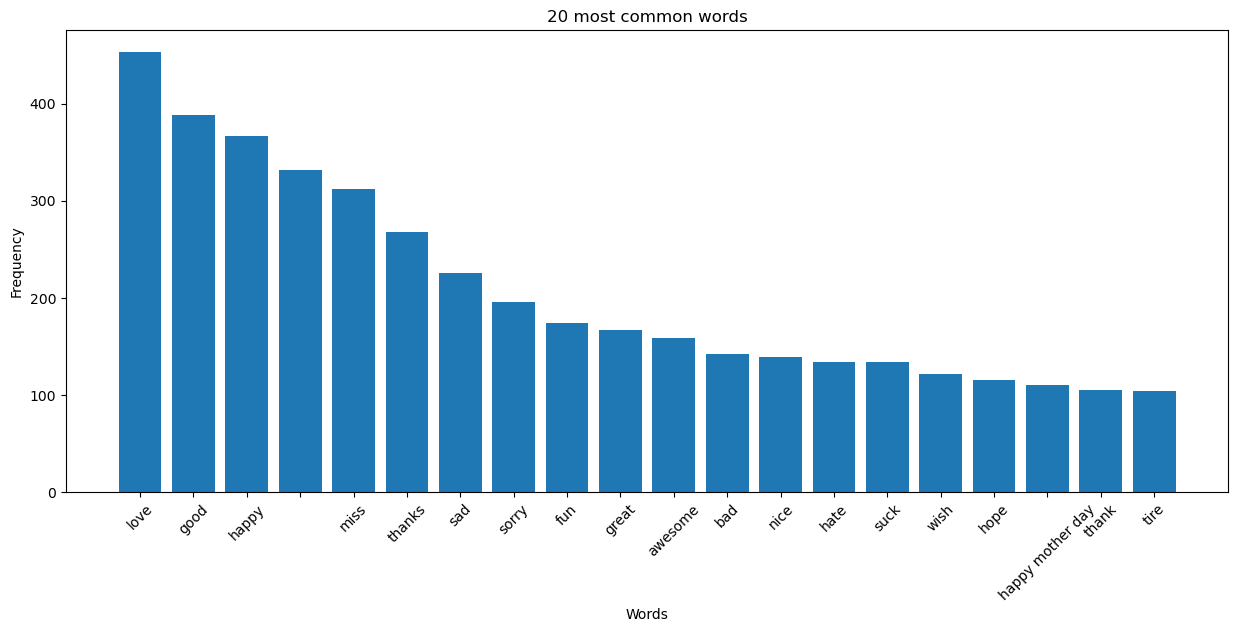

In [39]:
plt.figure(figsize = (15, 6))
plt.bar(top_words.keys(), top_words.values())
plt.title('20 most common words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

##### Building word cloud:
    Word cloud is a wonderful tool to display the large number of words in the chart with respect to their frequent occurence in the corpus. Size of the word is determined the frequency of word.

In [40]:
from wordcloud import WordCloud

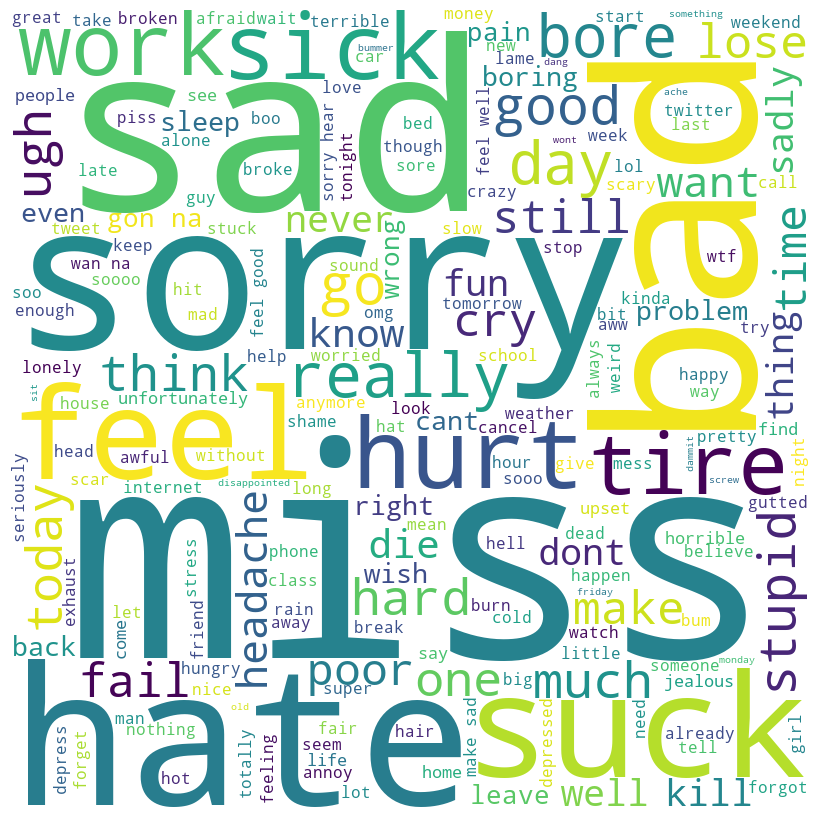

In [41]:
# get negative sentiment texts
word_cloud_df = df[df['sentiment'] == 0]
all_words = ' '.join([text for text in word_cloud_df['selected_text']])

wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate(all_words)

# plot image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

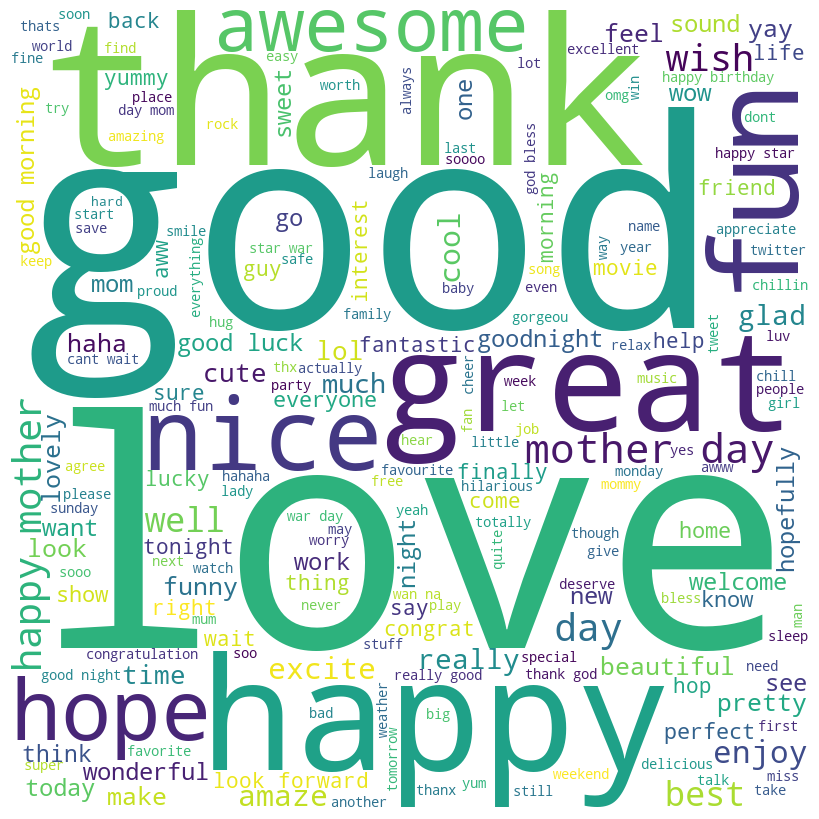

In [42]:
# plot for positive sentiment
word_cloud_df = df[df['sentiment'] == 2]
all_words = ' '.join([text for text in word_cloud_df['selected_text']])

wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate(all_words)

# plot image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### We are now move to modelling

The modelling task is divided into 4 steps:
- Creating the bag of word model
- Spliting into train and test 
- Model building
- Testing the model


##### Step 1 and 2: Bag of word model with spliting data set
    Bag of word model means it is basically the sparse matrix of words in our corpus. Imaging each row as a document or tweet of our corpus and columns as the words appearing in the document. Each cell of the matrix denotes the frequency of the word appearing in the document.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
# creating sparse matrix of top 2500 tokens
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(df.selected_text).toarray()
y = df.sentiment.values

In [45]:
# splitting dataset into train and test
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### Step 3 and 4: Building and testing model
    There are many algorithms that have given significantly good results in classifying polarity of sentiments. i.e. support vector machine, Naive bayes, Logistic regression etc.
    Here i used Random Forest classifire and Logistic Regression algorithm.

##### 1. Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc = RandomForestClassifier(random_state = 0)

In [63]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [64]:
rfc_y_pred = rfc.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [70]:
score = accuracy_score(rfc_y_pred, y_test)
score

0.7701965065502183

##### The accuracy score is 77%.

In [69]:
print(classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1523
           1       0.81      0.74      0.77      2275
           2       0.78      0.81      0.80      1698

    accuracy                           0.77      5496
   macro avg       0.77      0.77      0.77      5496
weighted avg       0.77      0.77      0.77      5496



##### 2. Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression(n_jobs = -1)

In [49]:
lr.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [50]:
lr_y_pred = lr.predict(X_test)

In [56]:
score = accuracy_score(y_test, lr_y_pred)
score

0.7933042212518195

##### The accuracy score is 79%.

In [57]:
confusion_matrix(y_test, lr_y_pred)

array([[1183,  236,  104],
       [ 288, 1813,  174],
       [ 153,  181, 1364]], dtype=int64)

In [60]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1523
           1       0.81      0.80      0.80      2275
           2       0.83      0.80      0.82      1698

    accuracy                           0.79      5496
   macro avg       0.79      0.79      0.79      5496
weighted avg       0.80      0.79      0.79      5496

